In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

In [2]:
t = np.linspace(0,500,1000) #time stamp

beta = 0.04 #transmission rate
gamma = 0.01 #recovery rate

params = [beta,gamma]

y0 = [100,1,0] #initial parameters: susceptible, infected, recovered



In [3]:
def sim_sir(variables,t,params):
    S = variables[0]
    I = variables[1]
    R = variables[2]

    N = S + I + R

    beta = params[0]
    gamma = params[1]

    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I

    return([dSdt,dIdt,dRdt])

In [4]:
#integrating 
y = odeint(sim_sir,y0,t,args = (params,))
y

array([[1.00000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.99800326e+01, 1.01492514e+00, 5.04227600e-03],
       [9.99597714e+01, 1.03006885e+00, 1.01597700e-02],
       ...,
       [2.39240838e+00, 4.35263548e+00, 9.42549561e+01],
       [2.39034984e+00, 4.33295834e+00, 9.42766918e+01],
       [2.38830236e+00, 4.31336840e+00, 9.42983292e+01]])

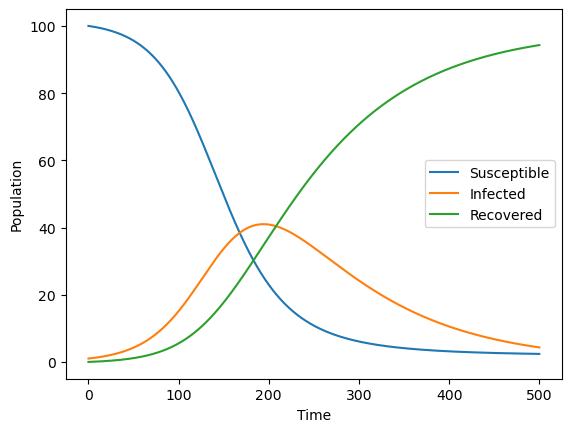

In [5]:
#plotting
plt.plot(t,y[:,0],label = 'Susceptible')
plt.plot(t,y[:,1],label = 'Infected')
plt.plot(t,y[:,2],label = 'Recovered')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

plt.show()
